In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
data=pd.read_csv("dataset/best/important.csv")
print(data.shape)
data

(4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [194]:
print(data.dtypes)
data=data.drop(['date','street','city','statezip','country'],axis=1)
data

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


In [195]:
print(data.isnull().sum())
data['view'].value_counts()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64


0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

# Handling the bedroom, bathroom and floors values to its ceiling 

In [196]:
data['bedrooms']=np.ceil(data['bedrooms'])
data['bathrooms']=np.ceil(data['bathrooms'])
data['floors']=np.ceil(data['floors'])
data.ndim

2

# corelation matrix 

In [197]:
cor_matrix=data.corr()
cor_matrix

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.310759,0.430322,0.050451,0.153932,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.519382,0.594876,0.068819,0.184325,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.310759,0.519382,1.000000,0.729158,0.096922,0.465284,0.068422,0.193394,-0.134836,0.670664,0.267900,0.501984,-0.235380
sqft_living,0.430322,0.594876,0.729158,1.000000,0.210642,0.322167,0.117643,0.311103,-0.062560,0.876592,0.446417,0.287340,-0.122476
sqft_lot,0.050451,0.068819,0.096922,0.210642,1.000000,0.012092,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.153932,0.184325,0.465284,0.322167,0.012092,1.000000,0.024314,0.038669,-0.223559,0.488533,-0.238286,0.339847,-0.203457
waterfront,0.135648,-0.003483,0.068422,0.117643,0.017241,0.024314,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.193394,0.311103,0.073907,0.038669,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.134836,-0.062560,0.000558,-0.223559,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.670664,0.876592,0.216455,0.488533,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


In [198]:
cor_matrix['price'].sort_values()

yr_renovated    -0.028774
yr_built         0.021857
condition        0.034915
sqft_lot         0.050451
waterfront       0.135648
floors           0.153932
bedrooms         0.200336
sqft_basement    0.210427
view             0.228504
bathrooms        0.310759
sqft_above       0.367570
sqft_living      0.430322
price            1.000000
Name: price, dtype: float64

C:\Users\ashut\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ashut\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\ashut\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\ashut\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E8A536088>,
      dtype=object)

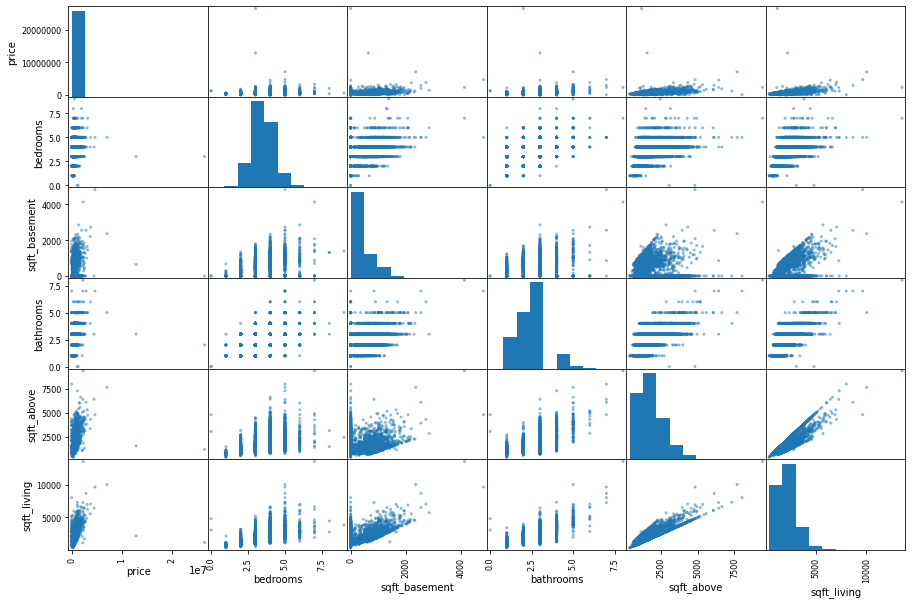

In [199]:
from pandas.plotting import scatter_matrix
scatter_matrix(data[['price','bedrooms','sqft_basement','bathrooms','sqft_above','sqft_living']],figsize=(15,10))

In [200]:
x=data.drop(['price'],axis=1)
y=data['price']
y.max()

26590000.0

<Figure size 432x288 with 0 Axes>

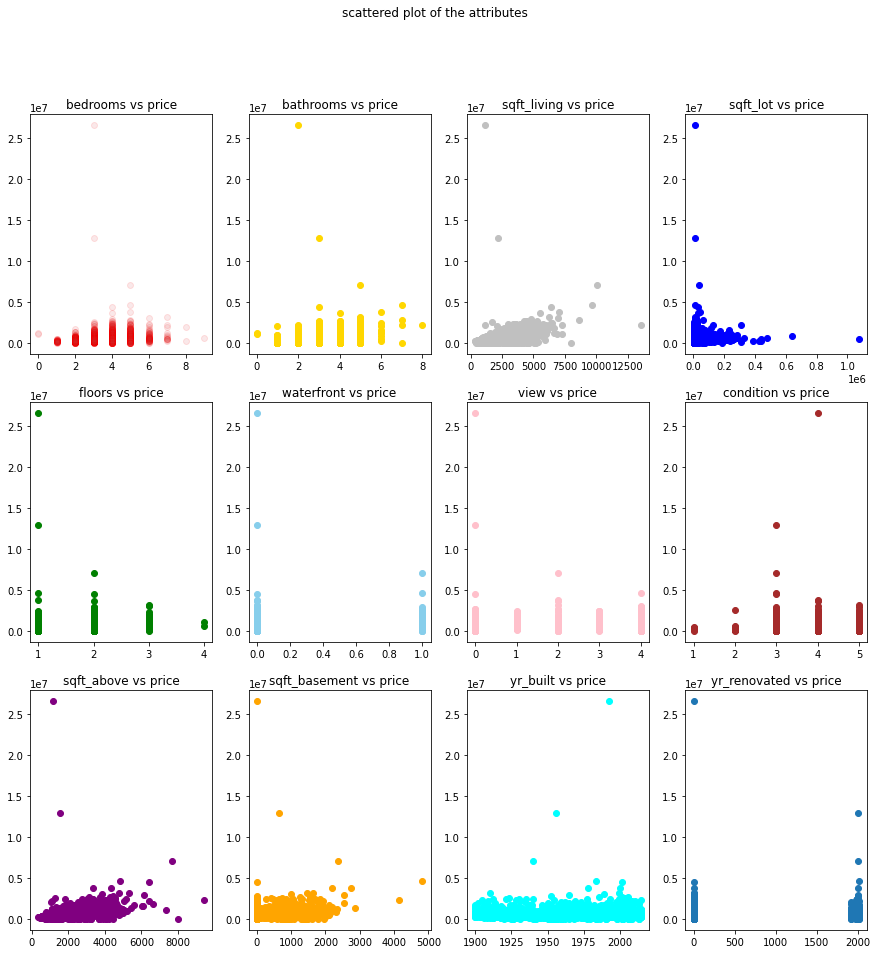

In [201]:
plt.figure()
fig, ax = plt.subplots(3, 4,figsize=(15,15))
fig.suptitle('scattered plot of the attributes')
ax[0,0].scatter(x['bedrooms'],y,c='tab:red',alpha=0.1,edgecolors='red')
ax[0,0].set_title('bedrooms vs price')

ax[0,1].scatter(x['bathrooms'],y,color='gold')
ax[0,1].set_title('bathrooms vs price')

ax[0,2].scatter(x['sqft_living'],y,color='silver')
ax[0,2].set_title('sqft_living vs price')

ax[0,3].scatter(x['sqft_lot'],y,color='blue')
ax[0,3].set_title('sqft_lot vs price')

ax[1,0].scatter(x['floors'],y,color='green')
ax[1,0].set_title('floors vs price')

ax[1,1].scatter(x['waterfront'],y,color='skyblue')
ax[1,1].set_title('waterfront vs price')

ax[1,2].scatter(x['view'],y,color='pink')
ax[1,2].set_title('view vs price')

ax[1,3].scatter(x['condition'],y,color='brown')
ax[1,3].set_title('condition vs price')

ax[2,0].scatter(x['sqft_above'],y,color='purple')
ax[2,0].set_title('sqft_above vs price')

ax[2,1].scatter(x['sqft_basement'],y,color='orange')
ax[2,1].set_title('sqft_basement vs price')

ax[2,2].scatter(x['yr_built'],y,color='cyan')
ax[2,2].set_title('yr_built vs price')

ax[2,3].scatter(x['yr_renovated'],y,c='tab:blue')
ax[2,3].set_title('yr_renovated vs price')

plt.show()

In [202]:
'''fig, ax = plt.subplots(figsize=(5,5))
scale = 200.0 * np.random.rand(8000)
ax.scatter(x['bedrooms'],y, c='tab:red', label=color,s=scale,
               alpha=0.3, edgecolors='none')


ax.scatter(x['bathrooms'],y,c='tab:gold', label=color,
               alpha=0.3, edgecolors='none')

ax.scatter(x['sqft_living'],y,c='tab:silver')

ax.scatter(x['sqft_lot'],y,color='tab:blue')

ax.scatter(x['floors'],y,color='tab:green')

ax.scatter(x['waterfront'],y,color='tab:skyblue')

ax.scatter(x['view'],y,color='pink')

plt.show()'''


"fig, ax = plt.subplots(figsize=(5,5))\nscale = 200.0 * np.random.rand(8000)\nax.scatter(x['bedrooms'],y, c='tab:red', label=color,s=scale,\n               alpha=0.3, edgecolors='none')\n\n\nax.scatter(x['bathrooms'],y,c='tab:gold', label=color,\n               alpha=0.3, edgecolors='none')\n\nax.scatter(x['sqft_living'],y,c='tab:silver')\n\nax.scatter(x['sqft_lot'],y,color='tab:blue')\n\nax.scatter(x['floors'],y,color='tab:green')\n\nax.scatter(x['waterfront'],y,color='tab:skyblue')\n\nax.scatter(x['view'],y,color='pink')\n\nplt.show()"

# scalling and the normalization of the data

In [203]:
from sklearn.preprocessing import scale,StandardScaler,MinMaxScaler
x=MinMaxScaler().fit_transform(x)
#x=StandardScaler().fit_transform(x)
#y=MinMaxScaler().fit_transform(y)

# spliting the data into test ,train datasets 

In [204]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=3)
print(y_train.mean())
print(y_test.mean())
y_train.index
y_test.index

547307.0997425335
570586.5433959371


Int64Index([ 486, 3206,  811, 1948, 2488, 3133, 2091, 3727,   20, 2131,
            ...
            2135, 4256, 2734,   25, 1465, 1543, 3360,  915, 3722,   33],
           dtype='int64', length=920)

# applying the linear regression

In [205]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

print('coefficients=',regressor.coef_,'intercept=',regressor.intercept_)


coefficients= [-610031.46748546  381680.56439618 -391422.49799721 -649160.10694113
  127389.04438264  401255.36348246  163888.98859163   72105.92585231
 2843919.17370598 1430416.18290365 -312074.64721581   15900.263561  ] intercept= 275922.45610819524


# predictions and accuracy for train  and test data

In [206]:
y_pred_train=regressor.predict(x_train)
y_pred_test=regressor.predict(x_test)

print(y_pred_train.mean())
print(y_pred_test.mean())

sco1=regressor.score(x_train,y_train)
sco2=regressor.score(x_test,y_test)
print('train_score=',sco1)
print('test_score=',sco2)

df1 = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

547307.0997425248
549206.8069483278
train_score= 0.4214629415995808
test_score= 0.04014355482789522


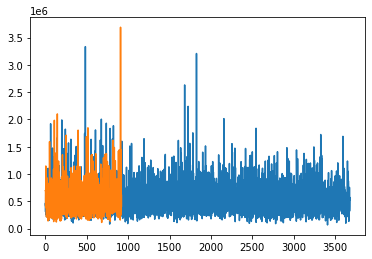

In [207]:
plt.plot(range(0,3680),y_pred_train)
plt.plot(range(0,920),y_pred_test)
plt.show()

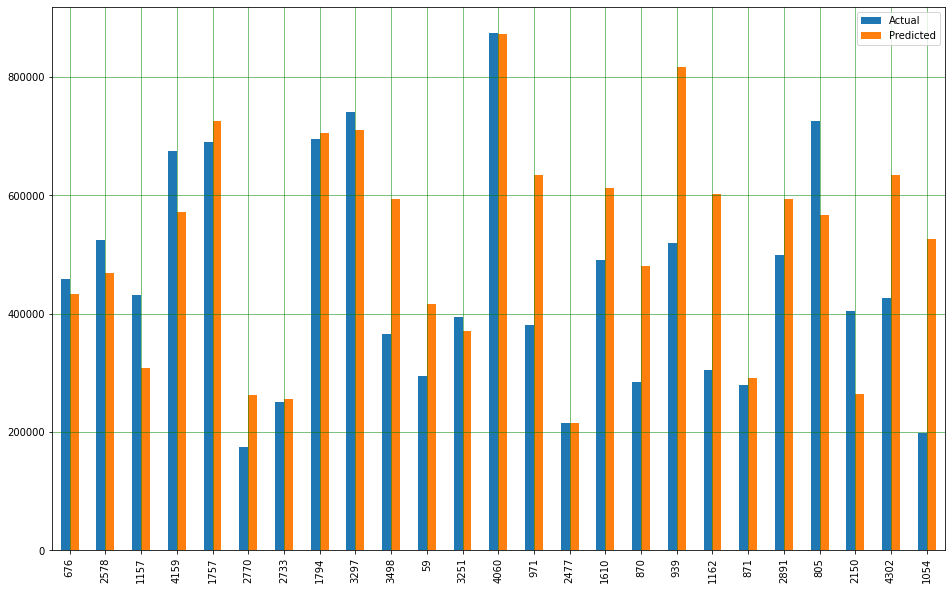

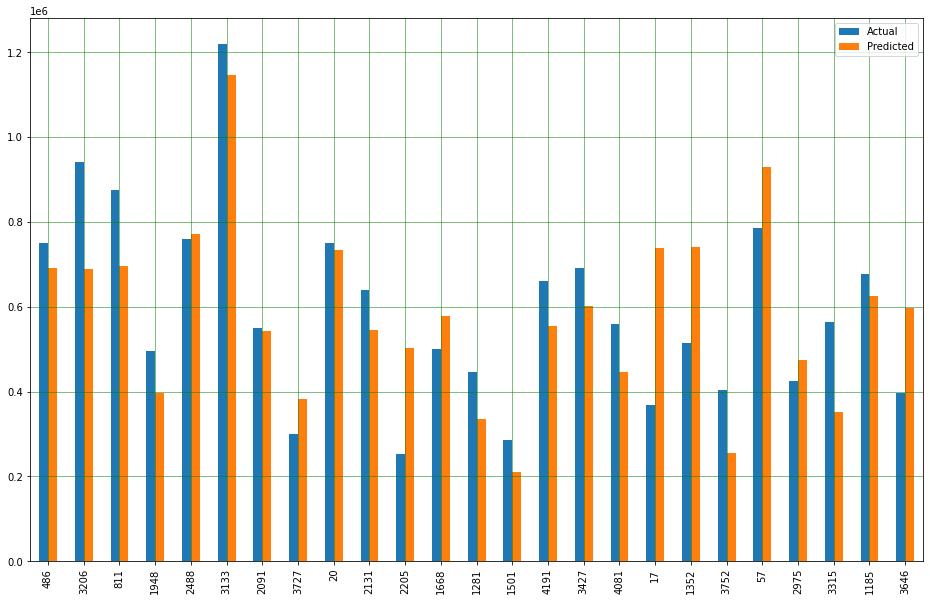

In [208]:
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
df2 = df2.head(25)
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [209]:
#difference between the y_train and y_predicted
df1['difference']=y_train-y_pred_train
df2['difference']=y_test-y_pred_test
print('max_error in train data:',df1['difference'].max(),'min_error in train data:',df1['difference'].min())
print('max_error in test data:',df2['difference'].max(),'min_error in text data:',df2['difference'].min())

max_error in train data: 158552.13595210074 min_error in train data: -327051.33560829144
max_error in test data: 252728.02885685454 min_error in text data: -369969.2194145075


# error measurment

In [210]:
from sklearn.metrics import mean_absolute_error,max_error,mean_squared_error

y_mean=y.mean()
print(y_mean)
print((y_mean/100)*60)


#errors for train data
print('mean_absolute_error=',mean_absolute_error(y_train, y_pred_train))
print('max_error=',max_error(y_train, y_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, y_pred_train))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
      

      
#errors for test data
print('mean_absolute_error=',mean_absolute_error(y_test, y_pred_test))
print('max_error=',max_error(y_test, y_pred_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

551962.9884732141
331177.79308392847
mean_absolute_error= 165068.83685902687
max_error= 12284185.681446606
Mean Squared Error: 105946690282.20338
Root Mean Squared Error: 325494.5318775776
mean_absolute_error= 189985.7965225879
max_error= 26393351.52958303
Mean Squared Error: 821881207360.123
Root Mean Squared Error: 906576.6417463684


# applying decision Tree alog

In [211]:
from sklearn.tree import DecisionTreeRegressor
DT_regressor=DecisionTreeRegressor(max_depth=1)
DT_regressor.fit(x_train,y_train)
y_pred_train=DT_regressor.predict(x_train)
y_pred_test=DT_regressor.predict(x_test)

In [212]:
df1=pd.DataFrame({'real':y_train,'pred':y_pred_train})
df1.head(30)

,real,pred
676,458000.0,458180.376791
2578,524000.0,458180.376791
1157,432000.0,458180.376791
4159,674600.0,458180.376791
1757,689800.0,458180.376791
2770,175000.0,458180.376791
2733,250275.0,458180.376791
1794,695000.0,985489.605831
3297,740000.0,985489.605831
3498,365000.0,458180.376791


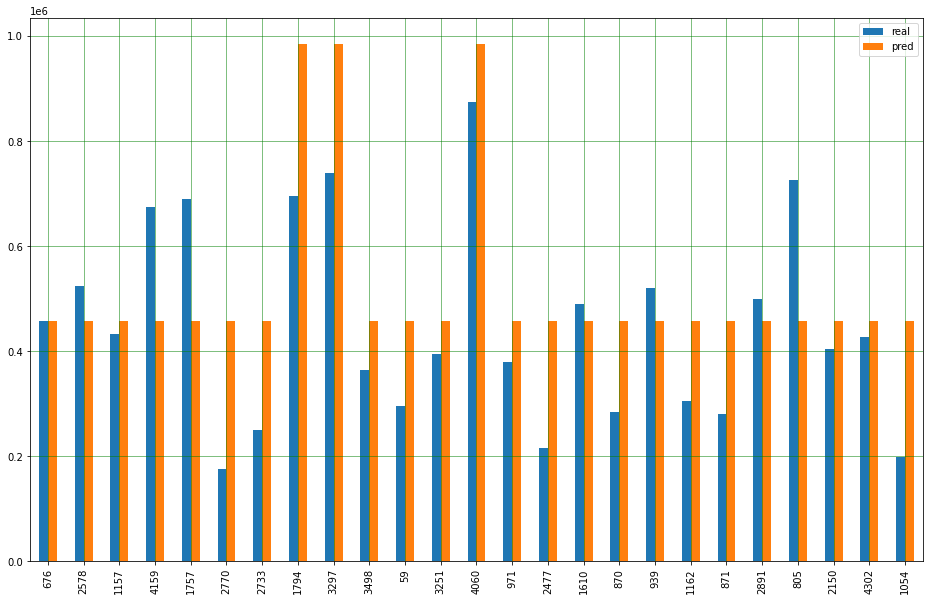

In [213]:
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [214]:
print('score_train=',DT_regressor.score(x_train,y_train))
print('score_test=',DT_regressor.score(x_test,y_test))

score_train= 0.21325870238094446
score_test= 0.031629346542366155


In [215]:

df2=pd.DataFrame({'real':y_test,'pred':y_pred_test})
df2.head(30)

,real,pred
486,750000.0,985489.605831
3206,941000.0,458180.376791
811,875000.0,458180.376791
1948,495000.0,458180.376791
2488,760000.0,458180.376791
3133,1220000.0,985489.605831
2091,550000.0,458180.376791
3727,300000.0,458180.376791
20,750000.0,458180.376791
2131,640000.0,458180.376791


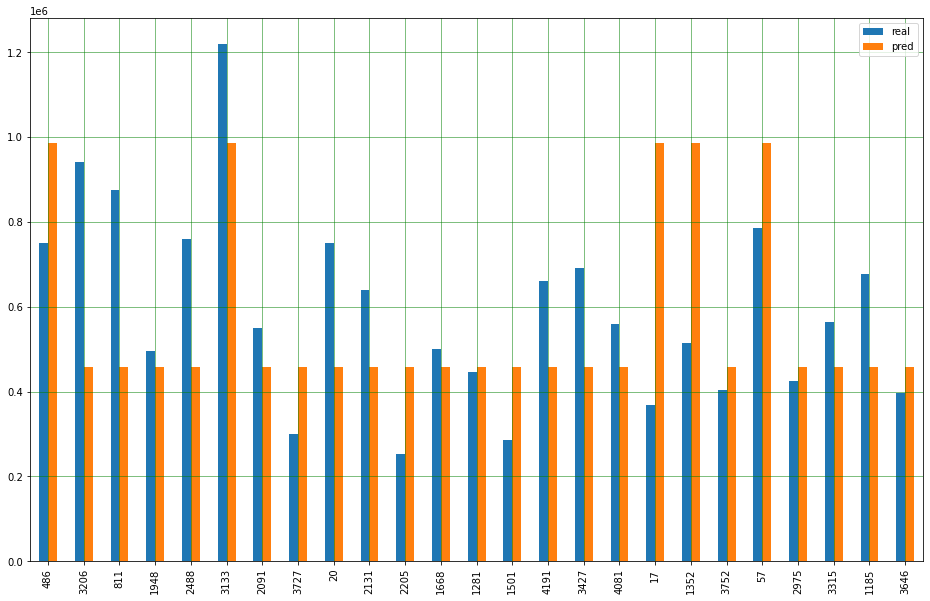

In [216]:
df2 = df2.head(25) 
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [217]:
#difference between the y_train and y_predicted
df1['difference']=y_train-y_pred_train
df2['difference']=y_test-y_pred_test
print('max_error in train data:',df1['difference'].max(),'min_error in train data:',df1['difference'].min())
print('max_error in test data:',df2['difference'].max(),'min_error in text data:',df2['difference'].min())

max_error in train data: 266819.6232094565 min_error in train data: -290489.60583125544
max_error in test data: 482819.6232094565 min_error in text data: -617989.6058312554


# gaussian_process alog

In [218]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
GP_regressor = GaussianProcessRegressor(kernel=kernel,random_state=4).fit(x_train, y_train)
GP_regressor.score(x_train, y_train)

0.0010126197723722141

# KNeighbors alog

In [219]:
from sklearn.neighbors import KNeighborsRegressor
NN_regressor = KNeighborsRegressor(n_neighbors=1,p=2,n_jobs=None)
NN_regressor.fit(x_train, y_train)
y_pred_train=NN_regressor.predict(x_train)
y_pred_test=NN_regressor.predict(x_test)

In [220]:
print('score_train=',NN_regressor.score(x_train, y_train))
print('score_test=',NN_regressor.score(x_test, y_test))

score_train= 0.9999943434860536
score_test= -0.21693989140715897


In [221]:
df1=pd.DataFrame({'real':y_train,'pred':y_pred_train})
df1.head(30)

,real,pred
676,458000.0,458000.0
2578,524000.0,524000.0
1157,432000.0,432000.0
4159,674600.0,674600.0
1757,689800.0,689800.0
2770,175000.0,175000.0
2733,250275.0,250275.0
1794,695000.0,695000.0
3297,740000.0,740000.0
3498,365000.0,365000.0


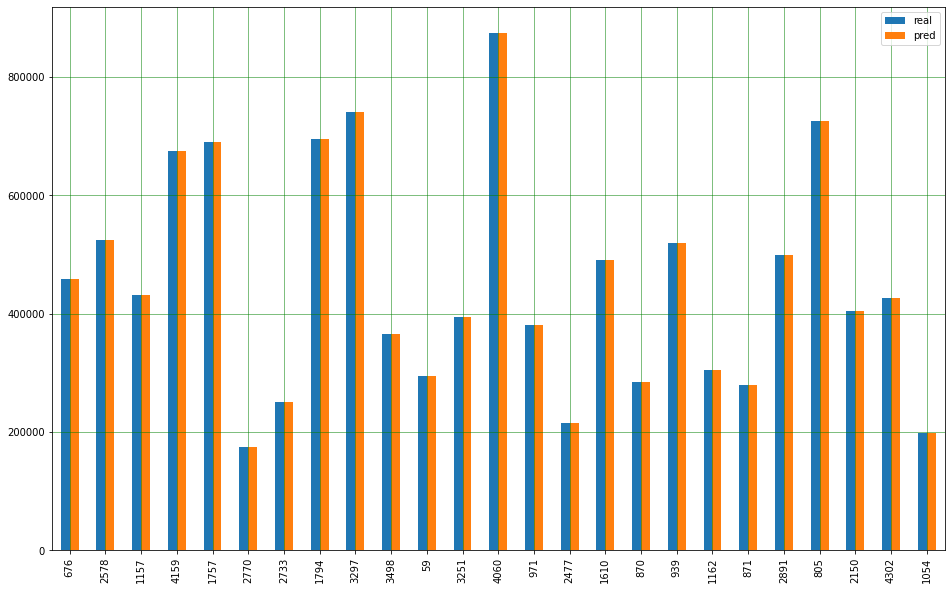

In [222]:
df1 = df1.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [223]:
df2=pd.DataFrame({'real':y_test,'pred':y_pred_test})
df2.head(30)

,real,pred
486,750000.0,655000.0
3206,941000.0,619400.0
811,875000.0,490000.0
1948,495000.0,365000.0
2488,760000.0,905000.0
3133,1220000.0,1450000.0
2091,550000.0,395000.0
3727,300000.0,300000.0
20,750000.0,845000.0
2131,640000.0,470000.0


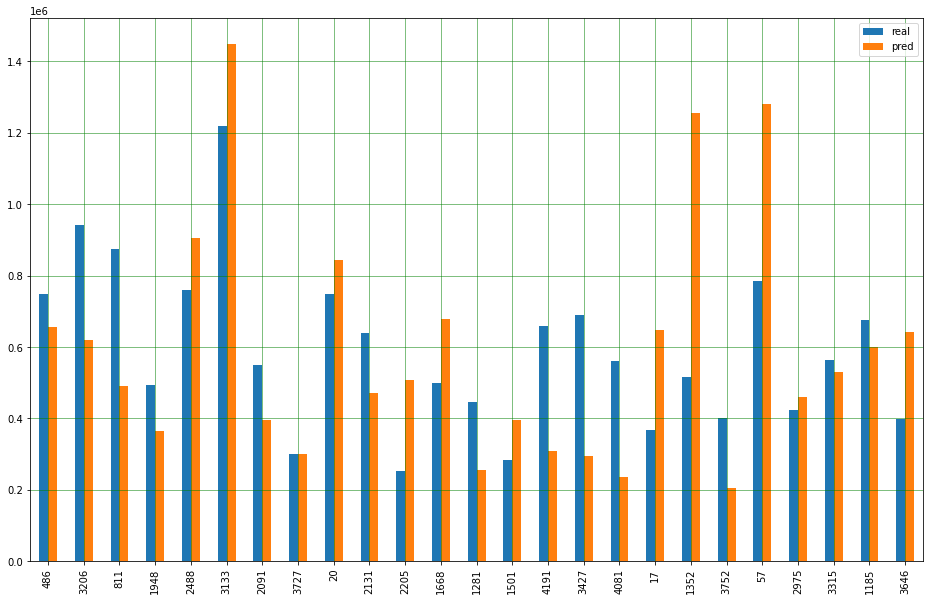

In [224]:
df2 = df2.head(25) 
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [225]:
#difference between the y_train and y_predicted
df1['difference']=y_train-y_pred_train
df2['difference']=y_test-y_pred_test
print('max_error in train data:',df1['difference'].max(),'min_error in train data:',df1['difference'].min())
print('max_error in test data:',df2['difference'].max(),'min_error in text data:',df2['difference'].min())

max_error in train data: 0.0 min_error in train data: 0.0
max_error in test data: 395000.0 min_error in text data: -740000.0


In [145]:
from sklearn import svm
regr = svm.SVR(gamma='auto')
regr.fit(x_train, y_train)
regr.score(x_train, y_train)

-0.040713885768328906

In [146]:
regr.score(x_test, y_test)

-0.014037958375916038